# Apuntes Scikit learn

###  Jennifer Balade González

## Introducción

In [2]:
#### Este ejercicio sirve de apunte para introducir el paquete scikitlearn en python.
#### Usamos la base digits() y diferentes algoritmos de clasificación binaria:

#### KNN
#### regresion logistica (+ validación cruzada, + GridSearchCV)

###  1. Preparar los datos

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [2]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
#####: Explicación de la base: 
#### digits.data: es un array NumPy de forma (1797, 64). 
#### Cada fila representa una imagen individual, y cada una de las 64 columnas corresponde a un valor de píxel específico. 
#### Las imágenes originales de 8x8 píxeles se han aplanado en un vector de 64 características (de ahí las columnas), 
### con valores que oscilan entre 0 (blanco) y 16 (negro), representando la intensidad de la escala de grises.


#### digits.target: es un array de forma (1797,) contiene la etiqueta de clase verdadera para cada imagen correspondiente en digits.data. 
#### Los valores en este target son números enteros del 0 al 9, 
#### indicando cuál es el dígito manuscrito correcto representado en los datos de píxeles.

In [8]:
#### Vamos a guardar los valores de los valores y el target, así como sus nombres, en dos objetos.

In [7]:
x_digits, y_digits = digits.data, digits.target
x_names, y_names = digits.feature_names, digits.target_names

In [10]:
#### Visualizo un poco los datos

In [11]:
from matplotlib import pyplot as plt

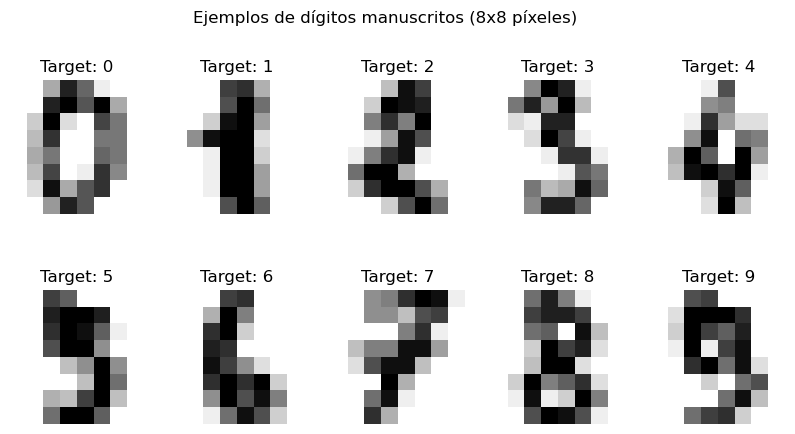

In [12]:
plt.figure(figsize=(10, 5)) #coloco los 10 valores,  por cada fila
for i in range(10): #recorro todos los target
    ax = plt.subplot(2, 5, i + 1) #2 filas, 5 columnas, y la posición donde irá
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')  # Muestra la matriz 8x8 como imagen en escala de grises
    ax.set_title(f'Target: {digits.target[i]}') #el titulo de cada "numero" será el número de su target
    ax.axis('off') # Oculta los márgenes para que se vea mejor

plt.suptitle("Ejemplos de dígitos manuscritos (8x8 píxeles)") #titulo
plt.show() #mostrar

In [13]:
#### Para realizar el siguiente punto (Clasificador Knn) es necesario utilizar una muestra de entrenamiento y test.
#### Vamos a usar la función train_test_solit(), y separamos en entrenamiento y prueba con una partición 75%-25%

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x_digits,y_digits,test_size = 0.25)

In [15]:
#### Normalizamos los datos para evitar inferencias en la precisión de los modelos aprendidos.
#### para el StandardScaler() lo que haces pasar la media a 0 y la desviación típica a 1
### el primer paso es llamar a esta función, y calcular los parámetros

In [9]:
from sklearn.preprocessing import StandardScaler

normalizador=StandardScaler()

normalizador.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [17]:
print(normalizador.mean_)
print(normalizador.scale_)

[0.00000000e+00 3.26651819e-01 5.38604306e+00 1.19227914e+01
 1.19213066e+01 5.81365999e+00 1.35337788e+00 1.18782480e-01
 2.96956199e-03 2.03786192e+00 1.04684484e+01 1.19836674e+01
 1.04216778e+01 8.20118782e+00 1.80697847e+00 9.35412027e-02
 2.96956199e-03 2.58203415e+00 9.72457313e+00 6.92873051e+00
 7.19599109e+00 7.80103935e+00 1.67483296e+00 4.08314774e-02
 7.42390497e-04 2.41870824e+00 8.84780995e+00 8.85077951e+00
 1.00363771e+01 7.44840386e+00 2.22568671e+00 1.48478099e-03
 0.00000000e+00 2.28953229e+00 7.57089829e+00 9.17371938e+00
 1.04565702e+01 8.70824053e+00 2.83073497e+00 0.00000000e+00
 1.03934670e-02 1.58871566e+00 6.85077951e+00 7.27468448e+00
 7.69784707e+00 8.22271715e+00 3.42242019e+00 2.15293244e-02
 7.42390497e-03 7.17149220e-01 7.56198961e+00 9.54268745e+00
 9.45731255e+00 8.80178174e+00 3.73273942e+00 2.11581292e-01
 0.00000000e+00 2.99183370e-01 5.73199703e+00 1.21507053e+01
 1.18218263e+01 6.78322197e+00 2.06755754e+00 4.13511507e-01]
[1.         0.92329146 

In [18]:
#### utilizo el método transform para normalizar los datos de x_train
#### lo guardo en un nuevo objeto llamado xn_train
#### compruebo que salió bien

####apunte: axis = 0: Un valor por columna; axis = 1: Un valor por fila

In [15]:
xn_train = normalizador.transform(x_train)

import numpy as np
print(np.mean(xn_train,axis=0))
print(np.std(xn_train,axis=0))

[ 0.00000000e+00 -7.16246331e-17 -1.53541701e-16 -1.43002001e-16
 -3.37929800e-18 -1.58250053e-17  7.73117444e-17 -1.75373203e-16
 -1.76794981e-16 -5.75716988e-17 -2.34902422e-17  1.52480519e-17
  3.07845805e-17  2.66222745e-17  1.52975051e-16 -8.79029589e-17
  6.32536587e-16 -2.39899250e-16  1.56601614e-17  7.08828360e-17
  3.29357922e-16 -1.18687539e-17 -1.57508255e-16 -2.55301843e-16
 -5.50907995e-16  1.63854742e-16 -1.33358638e-16 -7.63226816e-17
 -1.37150046e-16  6.21461144e-17 -2.78750874e-16  2.99304836e-16
  0.00000000e+00 -1.53098684e-16  5.85195507e-17 -1.88911000e-16
  3.44523552e-17  1.27630316e-16  2.15615697e-16  0.00000000e+00
  3.47861639e-16 -9.47851877e-18  2.24187574e-16 -2.71374113e-16
 -7.64875254e-17 -1.25940667e-16 -5.30590996e-17 -2.22147632e-16
  3.23681113e-16 -1.45041943e-16 -1.07148473e-17 -5.81898631e-17
 -1.40199656e-16 -1.75558652e-17  1.66080133e-16 -1.72632674e-16
 -3.10828448e-16 -4.96921649e-16 -2.16357494e-17 -8.89538381e-17
  1.52274465e-16  2.15286

In [16]:
#### Ahora lo mismo pero para x_test

normalizador.fit(x_test)
xn_test = normalizador.transform(x_test)


###  2. Clasificador Knn

In [ ]:
#### KNN es un algoritmo de clasificación que asigna a un ejemplo la clase más frecuente entre sus k vecinos más cercanos 
#### en el espacio de características. 

#### El parámetro k determina cuántos vecinos se consideran: 
#### un valor pequeño hace que el clasificador sea más sensible al ruido, 
#### mientras que un valor grande suaviza las decisiones pero puede perder detalles locales. 

#### No tiene fase de entrenamiento como tal, ya que la “memoria” del modelo son los datos de entrenamiento; 
#### la predicción se realiza comparando distancias (euclídeas) entre el ejemplo nuevo y los datos existentes.

In [21]:
#### Para usar el Knn podemos darle de entrada ya el número de vecinos k, por ejemplo:

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

In [17]:
knn.fit(xn_train,y_train)
knn.score(xn_train,y_train)

0.9806978470675576

In [18]:
knn.predict(xn_test)
knn.score(xn_test,y_test)

0.9444444444444444

In [25]:
#### Los resultados muestran que El 96.22 % de los ejemplos del conjunto de test 
#### han sido clasificados correctamente por el modelo KNN.

In [26]:
#### No obstante, podemos averiguar que "k" es mejor para nuestros datos de la siguiete manera:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

training_accuracy = [] #lista vacia para los datos de entrenamiento 
test_accuracy = []  #lista vacía para los datos de test

neighbors_settings = range(1, 15) #pruebo con los "k" del 1 al 15

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(xn_train, y_train)
    
    training_accuracy.append(knn.score(xn_train, y_train))
    test_accuracy.append(knn.score(xn_test, y_test))


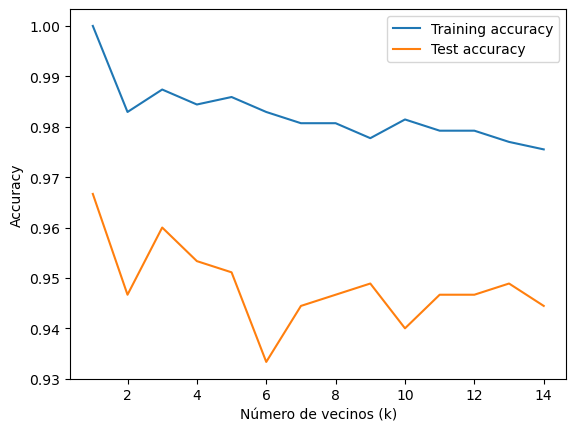

In [20]:
#visualizo todo
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
#### Parece ser que mi mejor "k" es el número 8.
#### Prosigo con este clasificador.

In [21]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(xn_train,y_train)
knn.score(xn_train,y_train)

0.9806978470675576

In [22]:
knn.predict(xn_test)
knn.score(xn_test,y_test)

0.9466666666666667

In [32]:
#### Los resultados muestran que El 97.33 % de los ejemplos del conjunto de test 
#### han sido clasificados correctamente por el modelo KNN.

#### un poco mejor que el clasificador primero que pusimos 
#### k = 7; score = 96.22 %
#### k = 8; score = 97.33 %

###  3. Clasificador Regresión logística

In [23]:
from sklearn.linear_model import LogisticRegression

In [34]:
#### En la regresión logística podemos realizarlo de dos maneras: 
#### 1) probando diferentes "C" o "regulaciones" :
    #### C = 1 [por defecto]
    #### C = 100 [más regularización, más flexible]
    #### C = 0.01 [menos regularización, más simple]
#### 2) Clasificación multiclase (One vs Rest)
    #### Se entrenan 10 clasificadores binarios
    #### Cada uno separa un dígito frente a los demás
    #### La predicción final es la clase con mayor puntuación

In [35]:
1) #### Veamos la clasificación de regresion logística en base a las regulaciones.

#### Primero vamos a ver el comportamiento de la regresión losgística con el C=1 (por defecto)

<class 'SyntaxError'>: unmatched ')' (<ipython-input-35-74956df06620>, line 1)

In [24]:
logreg = LogisticRegression().fit(xn_train, y_train)
print("Rendimiento sobre entranamiento: {:.3f}".format(logreg.score(xn_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(xn_test, y_test)))

Rendimiento sobre entranamiento: 0.999
Rendimiento sobre el conjunto de prueba: 0.967


In [ ]:
#### C=100, más regularización, más flexible

In [25]:
logreg = LogisticRegression(C = 100).fit(xn_train, y_train)
print("Rendimiento sobre entranamiento: {:.3f}".format(logreg.score(xn_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(xn_test, y_test)))

Rendimiento sobre entranamiento: 1.000
Rendimiento sobre el conjunto de prueba: 0.958


In [ ]:
#### C=0.01, menos regularización, más simple

In [26]:
logreg = LogisticRegression(C = 0.01).fit(xn_train, y_train)
print("Rendimiento sobre entranamiento: {:.3f}".format(logreg.score(xn_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(xn_test, y_test)))

Rendimiento sobre entranamiento: 0.958
Rendimiento sobre el conjunto de prueba: 0.936


In [ ]:
#### si comparamos las diferentes puntuaciones: 
    #### C = 1; rend. entrenamiento = 0.99; rend. prueba = 0.96
    #### C = 100; rend. entrenamiento = 1; rend. prueba = 0.96
    #### C = 0.01; rend. entrenamiento = 0.95; rend. prueba = 0.94

#### Al comparar distintos valores del parámetro de regularización C, se observa que valores muy grandes conducen a 
#### modelos excesivamente complejos que no mejoran el rendimiento en el conjunto de prueba, mientras que valores 
#### pequeños producen infraajuste. El valor intermedio C = 1 proporciona el mejor equilibrio entre capacidad de 
#### ajuste y generalización, alcanzando una precisión elevada sin sobreajuste.

In [ ]:
#### 2) Ahora vamos a probar el clasificador multiclase (one vs rest)

In [27]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(xn_train, y_train)

/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [28]:
# Predicciones
y_pred = lr.predict(xn_test)
y_pred

array([1, 7, 9, 4, 7, 4, 3, 5, 7, 7, 7, 9, 7, 8, 0, 2, 0, 7, 9, 2, 1, 1,
       4, 5, 1, 0, 1, 0, 3, 6, 3, 4, 9, 3, 4, 6, 7, 4, 7, 7, 2, 0, 8, 5,
       2, 9, 2, 5, 2, 4, 7, 4, 9, 8, 9, 1, 2, 4, 3, 4, 7, 8, 6, 3, 8, 7,
       4, 7, 7, 4, 7, 9, 8, 0, 9, 7, 0, 7, 0, 8, 0, 1, 3, 7, 7, 9, 5, 7,
       7, 0, 9, 0, 4, 8, 5, 7, 1, 7, 2, 3, 2, 0, 9, 4, 0, 3, 7, 4, 7, 1,
       3, 0, 6, 2, 4, 6, 0, 1, 8, 2, 3, 4, 0, 5, 2, 1, 3, 2, 8, 2, 8, 5,
       1, 4, 4, 8, 8, 0, 0, 2, 5, 5, 5, 6, 8, 0, 2, 6, 6, 8, 1, 6, 7, 8,
       5, 8, 1, 1, 4, 7, 8, 0, 4, 5, 1, 5, 2, 2, 6, 4, 0, 6, 6, 0, 2, 7,
       9, 2, 2, 8, 0, 4, 9, 4, 6, 4, 1, 7, 2, 9, 7, 7, 5, 2, 7, 8, 1, 3,
       5, 2, 9, 9, 8, 6, 7, 7, 8, 2, 6, 4, 4, 5, 3, 0, 1, 4, 8, 9, 3, 8,
       3, 4, 8, 1, 7, 8, 4, 3, 6, 8, 1, 4, 8, 5, 1, 0, 9, 5, 3, 3, 5, 1,
       6, 6, 1, 6, 0, 3, 3, 8, 2, 6, 1, 5, 6, 9, 8, 6, 8, 0, 6, 6, 9, 6,
       7, 8, 2, 2, 7, 3, 6, 6, 8, 7, 9, 0, 0, 8, 7, 6, 1, 4, 3, 2, 5, 2,
       5, 2, 4, 7, 9, 5, 0, 4, 5, 1, 9, 2, 4, 0, 0,

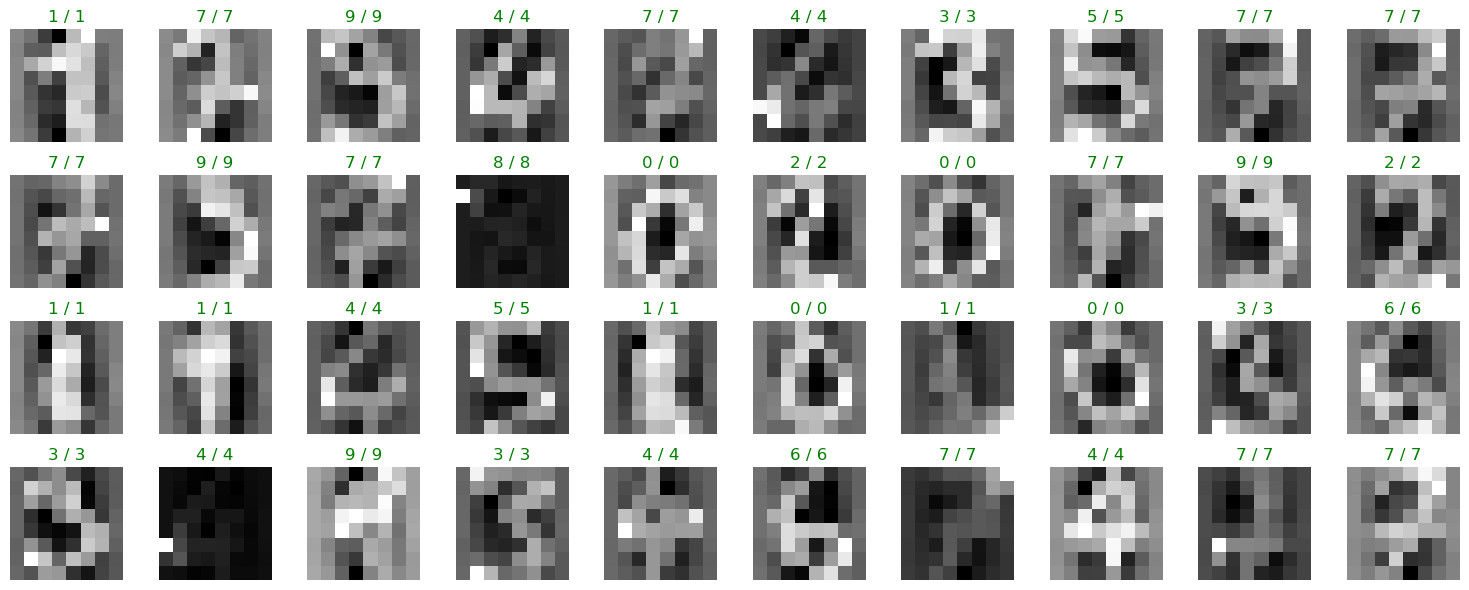

In [29]:
# Mostramos una cuadrícula de imágenes con predicción y etiqueta
fig, axes = plt.subplots(4, 10, figsize=(15, 6))
axes = axes.ravel()

for i in range(40):  # mostramos las primeras 40 imágenes
    axes[i].imshow(xn_test[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f'{y_pred[i]} / {y_test[i]}', color='green' if y_pred[i]==y_test[i] else 'red')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
#### Para ver la precision
y_pred = lr.predict(xn_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del clasificador: {accuracy:.4f}")

Exactitud del clasificador: 0.9600


In [ ]:
#### La precisión del clasificador es del 97.33 %

In [32]:
#### Para ver el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.82      1.00      0.90        33
           2       0.98      1.00      0.99        50
           3       1.00      0.91      0.95        43
           4       1.00      0.96      0.98        49
           5       0.92      0.97      0.94        35
           6       1.00      1.00      1.00        36
           7       0.97      0.98      0.98        60
           8       0.94      0.88      0.91        50
           9       0.95      0.91      0.93        44

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [ ]:
#### El reporte de clasificación muestra que mi modelo de regresión logística One-vs-Rest para los dígitos funciona muy bien. 
#### La exactitud global es del 97%, así que la mayoría de las predicciones son correctas. 
#### Las métricas por clase, como precisión, recall y F1-score, también son muy altas, lo que significa que el modelo acierta 
#### casi siempre y rara vez confunde los dígitos, aunque las clases 8 y 9 tienen un poco más de errores (ver columna de recall). 
#### Tanto el promedio macro como el ponderado confirman que el modelo está equilibrado, 
#### así que en general la clasificación multiclase es buena.

###  4. Validación cruzada

In [ ]:
#### La validación cruzada es otro método para evaluar la precisión de los modelos.
#### anteriormente hemos estado viendo este tipo de metodología: entramiento vs test
#### Esta es más precisa. Lo que hace es dividir en 5 partes iguales la data, 5 "split"
#### APUNTE: 5 partes o saltos es por defecto, pero podemos modificar la cantidad de saltos con el argumento cv = ...
#### En cada "split" 1/5 parte lo usa de test, y el 4/5 restante lo usa de entrenamiento. 
#### De cada "split" sacamos un valor de precisión.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000).fit(xn_train, y_train)
#le he tenido que añadir un número mayor de interacciones porque no me ajustaba bien el modelo

scores = cross_val_score(logreg, digits.data, digits.target) #puntuaciones de la validación cruzada
print("Resultados de la evaluación cruzada: {}".format(scores))

Resultados de la evaluación cruzada: [0.92222222 0.86944444 0.94150418 0.94150418 0.89693593]


In [ ]:
#### Resultados de la evaluación cruzada: [0.92222222 0.86944444 0.94150418 0.94150418 0.89693593]
#### Estos resultados son la media de los entrenamiento dentro de los 5 saltos que ha hecho la validación cruzada.

In [ ]:
#### Le pedimos la media de las 5 validaciones:

In [35]:
scores = cross_val_score(logreg, digits.data, digits.target)
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.2f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.92222222 0.86944444 0.94150418 0.94150418 0.89693593]
Evaluación media: 0.91


In [ ]:
#### En ocasiones puede ser que la extracción por splits no esté estractificada.
#### Es decir, que los saltos no seleccionen un número de datos equiparables entre los diferentes targets.
#### Especialemnte cuando los targets están ordenados, como pasa en los datos iris

#### Una manera de corregirlo es utilizando el argumento de estractificar, que se utiliza así:

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [37]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000).fit(xn_train, y_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(logreg, xn_test, y_test, cv=cv)

print("Resultados de la validación cruzada estratificada:", scores)
print("Media del rendimiento: {:.3f}".format(np.mean(scores)))

Resultados de la validación cruzada estratificada: [0.93333333 0.9        0.94444444 0.95555556 0.96666667]
Media del rendimiento: 0.940


In [ ]:
#### Podemos observar que el valor de precisión ha mejorado cuando hemos estractificado las clases (o targets) de la base
#### De 91 % hemos pasado a 95 % de precisión, mejorando también la media de precisión de los 5 splits

###  6. GridSearchCV

In [ ]:
#### Un grid search es un procedimiento para seleccionar los mejores hiperparámetros de un modelo. 
#### Consiste en definir una rejilla con distintas combinaciones posibles de esos hiperparámetros y, para cada una de ellas, 
#### evaluar el modelo mediante validación cruzada. 

#### El rendimiento medio obtenido en los distintos folds se compara entre combinaciones y se elige aquella que mejor generaliza. 
#### Por tanto, el grid search no sustituye a la validación cruzada, sino que la utiliza como herramienta para decidir qué 
#### valores de los hiperparámetros son los más adecuados.

#### APUNTE:Un hiperparámetro es un valor que se fija antes de entrenar un modelo y que controla cómo aprende.
#### como por ejemplo la C en la regresión logística, k en KNN o el número de folds (o cv) en la validación cruzada.

#### El grid search busca la mejor combinación de hiperparámetros (no solo uno, si hay varios) 
#### evaluando cada combinación mediante validación cruzada y seleccionando la que obtiene mejor rendimiento medio. 
#### Es decir, sirve para decidir qué valores de los hiperparámetros hacen que el modelo generalice mejor.

In [38]:
#repito la normalización para que no interfiera con los anterior
scaler = StandardScaler()
xn_train = scaler.fit_transform(x_train)
xn_test = scaler.transform(x_test)

In [41]:
#GRID SEARCH CASERO (Como vimos en clase)
best_score = 0
for penal in ["l1", "l2"]:   #diferentes tipos de regularización
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:  #diferentes grados de regularización
        logreg = LogisticRegression(penalty=penal, C=C, solver='saga', max_iter=1000)
        logreg.fit(xn_train, y_train)
        score = logreg.score(xn_test, y_test)

        if score > best_score:
            best_score = score
            best_parameters = {'penalty': penal, 'C': C}

print("Mejor resultado:", best_score)
print("Mejor combinación:", best_parameters)

/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/pytho

Mejor resultado: 0.9711111111111111
Mejor combinación: {'penalty': 'l2', 'C': 0.1}


In [ ]:
#### Lo que hemos hecho aqui es comparar l1 vs l2, con diferentes niveles de regularización (C)

#### APUNTES:
####L1 y L2 (penalties o regularizaciones)
####Son formas de penalizar los coeficientes del modelo para evitar sobreajuste:
    ####L1 (Lasso):
        #### Hace que algunos coeficientes queden exactamente en 0, eliminando variables irrelevantes
        #### Útil si queremos selección automática de características.
        #### L1 → “apaga” algunas variables.
    ####L2 (Ridge):
        ####Reduce todos los coeficientes, pero ninguno llega a 0.
        ####Favorece soluciones más estables y distribuye la penalización entre todas las variables.
        #### L2 → “achica” todas las variables pero mantiene todas activas.

#### el argumento "solver" son algoritmos que usa scikit-learn para entrenar el modelo de regresión logística
#### Algunos soportan solo L1, otros solo L2, otros ambos; algunos funcionan con multiclase, otros no:
    #### liblinear = Sporta L1 y L2. Multiclase: One-vs-Rest.	Bueno para pocas clases y datasets pequeños.
    #### lbfgs = Solo L2. Multiclase: Multinomial.	Estable, rápido, recomendado en multiclase.
    #### saga = Soporta L1 y L2. Multiclase: Multinomial.	Escalable, funciona bien con datasets grandes.
    #### newton-cg = Solo L2. Multiclase: Multinomial.	Similar a lbfgs, estable.

In [ ]:
#### En los resultados anteriores nos ha salido un 97.11 % cuando usamos un penalty L2, y un C pequeño de 0.1:
    #### Mejor resultado: 0.9711111111111111
    #### Mejor combinación: {'penalty': 'l2', 'C': 0.1}

#### No obstante, hacer un grid search casero usando el conjunto de test es arriesgado, 
#### porque se filtra información del test al modelo, dando resultados demasiado optimistas. 
#### Para medir el rendimiento real, el test debe ser independiente, sin haberse usado ni para entrenar 
#### ni para ajustar hiperparámetros.

In [ ]:
### Por eso se suele partir el conjunto de datos original en tres partes: 
    ### - entrenamiento (para entrenar el modelo)
    ### - validación (para ajustar los parámetros del modelo)
    ### - test (para dar una estimación del rendimiento del modelo finalmente escogido)

In [45]:
#GRID SEARCH CON ENTRENAMIENTO, VALIDACIÓN Y TEST

# partición: entrenamiento+validación y test
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

# Partimos entrenamiento+validación en entrenamiento y validación
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, random_state=1)
print("Tamaño del conjunto de entrenamiento: {}\nTamaño del conjunto de validación: {}\nTamaño del conjunto de test:"
      " {}\n".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

best_score = 0

for penal in ["l1","l2"]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # por cada combinación de valores de los parámetros, entrenamos un log reg
        logreg = LogisticRegression(penalty=penal,solver="saga", C=C, max_iter = 1000)
        logreg.fit(x_train, y_train)
        # Y lo evaluamos sobre el conjunto de validacion
        score = logreg.score(x_valid, y_valid)
        # Nos vamos quedando con el de mejor resultado
        if score > best_score:
            best_score = score
            best_parameters = {'penalty': penal, 'C': C}


# Volvemos a entrenar el modelo con la mejor combinación encontrada, sobre entrenamieno+validación  
# y evaluamos el rendimiento sobre el conjunto de prueba 
logreg = LogisticRegression(**best_parameters,solver="saga", max_iter = 1000)
logreg.fit(x_train, y_train)
test_score = logreg.score(x_test, y_test)
print("Mejor resultado sobre validación: {:.2f}".format(best_score))
print("Mejor combinación de valores: ", best_parameters)
print("Evaluación sobre el conjunto de test: {:.2f}".format(test_score))

Tamaño del conjunto de entrenamiento: 1010
Tamaño del conjunto de validación: 337
Tamaño del conjunto de test: 450



/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/pytho

Mejor resultado sobre validación: 0.99
Mejor combinación de valores:  {'penalty': 'l1', 'C': 1}
Evaluación sobre el conjunto de test: 0.95


In [ ]:
#### El grid search hecho de forma manual es correcto, pero depende mucho de cómo se haga la partición de los datos
#### Además, diferentes particiones pueden dar distinto valores óptimos de los hiperparámetros

#### Una forma más fiable es evaluar la mejor combinación de parámetros a los diferentes folds de la validación crzada
#### Esto reduce la variabilidad debida a la elección de un único conjunto de validación

#### Por ello, podemos usar la clase GridSearchCV integrado en scikit-learn:

In [53]:
normalizador=StandardScaler()
normalizador.fit(x_train)
xn_train = normalizador.transform(x_train)

normalizador.fit(x_test)
xn_test = normalizador.transform(x_test)


In [47]:
#GRID SEARCG CON VALIDACIÓN CRUZADA (integrada en sciklearn)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ["l1","l2"]}  #especifico los grids que voy a probar

In [56]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(solver="saga", max_iter = 1000), param_grid, cv=5)
                        #  return_train_score=True) # Se necesita par evitar warnings a partir de la 0.21
#por defecto, cv ya es igual a 5

In [ ]:
grid_search.fit(xn_train, y_train)

/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [58]:
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(xn_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.96
Mejor clasificador encontrado: {} LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')
Evaluación sobre el conjunto de test: 0.97


In [ ]:
####El modelo de regresión logística optimizado mediante GridSearchCV con validación cruzada
#### alcanza una precisión media de 0.96 en los conjuntos de validación, 
#### lo que indica que la combinación de hiperparámetros elegida (C=1, penalty='l1', solver='saga') generaliza bien 
#### durante el entrenamiento. 

#### Al evaluar este mismo modelo sobre el conjunto de test independiente, obtenemos una precisión de 0.97, 
#### confirmando que el modelo mantiene un rendimiento alto y consistente sobre datos no vistos, lo que sugiere una buena 
#### generalización.

In [ ]:
#### Ahora podemos ver, a traves de cv_results_ los resultados de todas esas combinaciones.

In [61]:
import pandas as pd
# convertimos a Dataframe los resultados del gridsearchcv anterior
results = pd.DataFrame(grid_search.cv_results_)

results_sorted = results.sort_values("rank_test_score") #para que me salgan los  primeros mejores ordenados

# Mostramos las cinco primeras filas
display(results_sorted.head()) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,8.7432,0.725585,0.0028,0.000400,1.0,l1,"{'C': 1, 'penalty': 'l1'}",0.945545,0.975248,0.955446,0.960396,0.970297,0.961386,0.010571,1
9,5.5312,0.039892,0.0026,0.000490,10.0,l2,"{'C': 10, 'penalty': 'l2'}",0.955446,0.970297,0.945545,0.965347,0.965347,0.960396,0.008856,2
7,4.6400,0.724403,0.0048,0.005154,1.0,l2,"{'C': 1, 'penalty': 'l2'}",0.955446,0.965347,0.945545,0.960396,0.970297,0.959406,0.008517,3
8,9.1538,0.539305,0.0022,0.000400,10.0,l1,"{'C': 10, 'penalty': 'l1'}",0.955446,0.965347,0.945545,0.965347,0.965347,0.959406,0.007921,3
10,9.8050,0.462595,0.0022,0.000400,100.0,l1,"{'C': 100, 'penalty': 'l1'}",0.955446,0.970297,0.945545,0.965347,0.960396,0.959406,0.008517,3


In [ ]:
#### INFORMACIÓN DE ESTAS TABLAS
    #### mean_fit_time -> tiempo medio que tarda en entrenarse el modelo en cada split de la validación cruzada
    #### std_fit_time -> desviación estándar del tiempo de entrenamiento entre split
    #### mean_score_time -> tiempo medio que tarda en evaluar el modelo en cada split
    #### std_score_time -> desviación estándar del tiempo de evaluación entre split
    
    #### param_C -> valor del hiperparámetro C (controla la fuerza de la regularización)
    #### param_penalty -> tipo de penalización usada (`l1` o `l2`)
    #### params -> diccionario con todos los hiperparámetros de la combinación
    
    #### split0_test_score … split4_test_score -> accuracy del modelo en cada pliegue de la validación cruzada
    #### mean_test_score -> media de las puntuaciones de todos los pliegues; indica capacidad de generalización estimada
    #### std_test_score -> desviación estándar de las puntuaciones; indica estabilidad del modelo entre pliegues
    
    #### rank_test_score -> posición relativa de la combinación según `mean_test_score`, 1 = mejor, 2 = segunda mejor, etc.


In [ ]:
#### También podemos ver las matrices de confusión del mejor modelo de la siguiente manera:
#### mejor modelo era l1, C=1

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

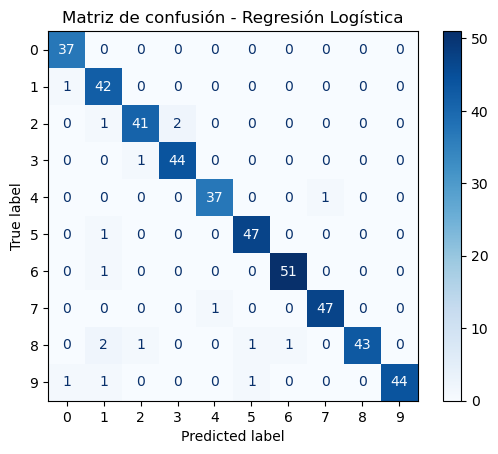

In [72]:
logreg = LogisticRegression(solver="saga", penalty="l1", C=1, max_iter=5000).fit(xn_train, y_train)

# Hacemos predicciones
y_pred = logreg.predict(xn_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# La mostramos visualmente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

In [ ]:
#### como podemos observar, obtenemos ciertos errores fuera de la diagonal
#### Por ej., cuando se predice 0, pero el valor real es 1

#### Pero en general los aciertos entre la predicción y la clasificación real se concentra en la diagonal

###  7. Mostrar la predicción sobre ejemplos concretos

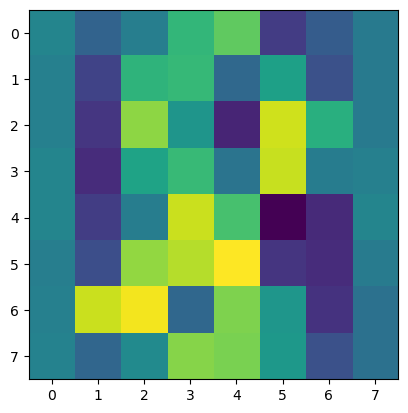

In [65]:
from matplotlib.pyplot import imshow

imshow(xn_train[0].reshape(8,8))

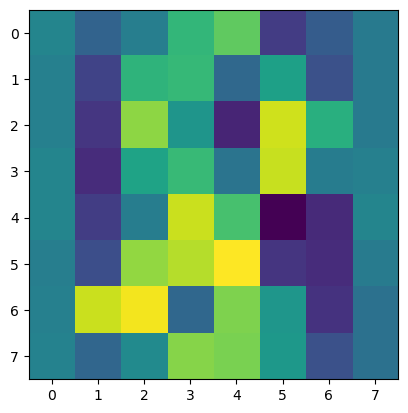

In [66]:
imshow(xn_train[6].reshape(8,8))

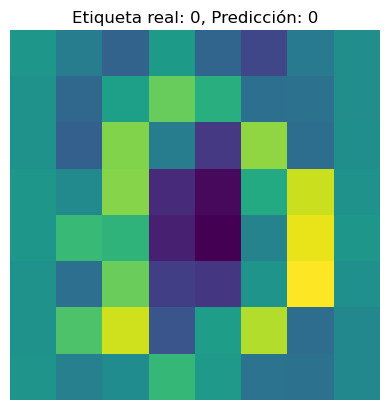

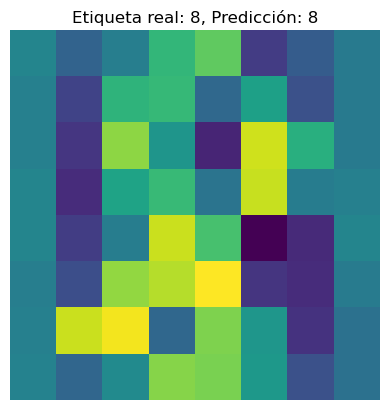

In [68]:
#### También podemos hacerlos a la vez usando el for: 

indices_ejemplos = [0, 6]

for i in indices_ejemplos:
    X_example = xn_train[i].reshape(1, -1)  # mantenemos la forma
    y_true = y_train[i]   # etiqueta real
    y_pred = lr.predict(X_example)[0]  # predicción del modelo

    # Mostrar la imagen
    plt.imshow(xn_train[i].reshape(8, 8))
    plt.title(f"Etiqueta real: {y_true}, Predicción: {y_pred}")
    plt.axis('off')
    plt.show()